# Proyek Data Mining - Projek Akhir

- Nama    : Isna Nur Amalia
- NIM     : A11.2022.14330
- Kelas   : A11.43UG1
- GitHub  : https://github.com/isnanramalia/klasifikasi-siswa-dropout/tree/main


### Tujuan
- Menemukan faktor-faktor yang mempengaruhi siswa untuk dikeluarkan atau dimutasi
- Memberikan treatment atau pencegahan agar hal yang sama tidak terjadi lagi
- Meningkatkan kualitas lulusan SMK Askhabul Kahfi


## Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
# load dataset
data = pd.read_csv("data_smk_askha_1.csv")
data.head()

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
0,L,2003-01-28,SEMARANG,Cilacap Tengah,Bersama orang tua,Sepeda,SMP / sederajat,Wiraswasta,"Rp. 5,000,000 - Rp. 20,000,000",D3,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
1,L,2004-11-14,SEMARANG,Mijen,Bersama orang tua,Jalan kaki,SMA / sederajat,Karyawan Swasta,"Rp. 500,000 - Rp. 999,999",SMP / sederajat,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
2,L,2006-05-26,Semarang,Ngaliyan,Bersama orang tua,Ojek,SD / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SMP / sederajat,Tidak bekerja,Tidak Berpenghasilan,Mutasi
3,L,1998-07-08,TEGAL,Balapulang,Panti asuhan,Sepeda motor,SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
4,L,1995-12-18,SEMARANG,Semarang,Asrama,Jalan kaki,SD / sederajat,Petani,NaN,SD / sederajat,Petani,NaN,Lulus


### Assessing Data

#### Menilai tabel `data_smk_askha`

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   JK                      1036 non-null   object
 1   Tanggal Lahir           1036 non-null   object
 2   Tempat Lahir            1036 non-null   object
 3   Asal Kecamatan          1036 non-null   object
 4   Jenis Tinggal           999 non-null    object
 5   Alat Transportasi       1007 non-null   object
 6   Jenjang Pendidikan Ayh  994 non-null    object
 7   Pekerjaan Ayh           994 non-null    object
 8   Penghasilan Ayh         745 non-null    object
 9   Jenjang Pendidikan Ibu  1012 non-null   object
 10  Pekerjaan Ibu           1011 non-null   object
 11  Penghasilan Ibu         716 non-null    object
 12  Keluar Karena           1036 non-null   object
dtypes: object(13)
memory usage: 105.3+ KB


In [4]:
data.isna().sum()

JK                          0
Tanggal Lahir               0
Tempat Lahir                0
Asal Kecamatan              0
Jenis Tinggal              37
Alat Transportasi          29
Jenjang Pendidikan Ayh     42
Pekerjaan Ayh              42
Penghasilan Ayh           291
Jenjang Pendidikan Ibu     24
Pekerjaan Ibu              25
Penghasilan Ibu           320
Keluar Karena               0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  5


In [6]:
data.describe() # utk melihat statistik deskriptif

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
count,1036,1036,1036,1036,999,1007,994,994,745,1012,1011,716,1036
unique,2,889,109,262,6,7,12,15,7,12,14,6,5
top,L,2003-01-28,SEMARANG,Singorojo,Asrama,Jalan kaki,SD / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Tidak bekerja,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
freq,641,4,333,124,589,844,357,335,412,381,312,275,820


#### Cleaning Data `data_smk_askha`

##### Duplicate data

In [7]:
data.duplicated().sum()

5

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [10]:
data.isna().sum()

JK                          0
Tanggal Lahir               0
Tempat Lahir                0
Asal Kecamatan              0
Jenis Tinggal              36
Alat Transportasi          28
Jenjang Pendidikan Ayh     41
Pekerjaan Ayh              41
Penghasilan Ayh           289
Jenjang Pendidikan Ibu     23
Pekerjaan Ibu              24
Penghasilan Ibu           318
Keluar Karena               0
dtype: int64

In [11]:
data[data['Jenis Tinggal'].isna()]

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
18,L,2004-07-11,DEMAK,Nabire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dikeluarkan
29,L,2003-04-17,SEMARANG,Ngaliyan,NaN,NaN,SMA / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SMA / sederajat,Tidak bekerja,"Kurang dari Rp. 500,000",Lulus
42,L,2002-06-18,(Tidak Diisi),Arut Utara,NaN,NaN,SMA / sederajat,Karyawan Swasta,"Rp. 500,000 - Rp. 999,999",SMP / sederajat,Tidak bekerja,"Kurang dari Rp. 500,000",Mutasi
158,P,2003-03-13,SEMARANG,Mijen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mutasi
177,L,2004-08-31,Kendal,Rowosari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mutasi
212,P,2001-08-03,Kendal,Limbangan,NaN,Jalan kaki,SD / sederajat,Petani,"Rp. 500,000 - Rp. 999,999",SD / sederajat,NaN,"Rp. 500,000 - Rp. 999,999",Lulus
257,P,2008-03-12,SEMARANG,Ungaran Timur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dikeluarkan
273,L,1999-05-26,JAKARTA,Beji,NaN,NaN,Tidak sekolah,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Tidak sekolah,Tidak bekerja,Tidak Berpenghasilan,Lulus
306,P,2000-09-05,Semarang,Pringapus,NaN,NaN,Tidak sekolah,NaN,NaN,Tidak sekolah,Lainnya,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
311,L,2000-05-30,Kendal,Singorojo,NaN,Jalan kaki,SD / sederajat,Petani,"Rp. 500,000 - Rp. 999,999",SD / sederajat,Petani,"Rp. 500,000 - Rp. 999,999",Lulus


In [12]:
data['Jenis Tinggal'].value_counts()

Jenis Tinggal
Asrama               587
Bersama orang tua    280
Pesantren            120
Lainnya                5
Wali                   2
Panti asuhan           1
Name: count, dtype: int64

In [13]:
data.fillna(value={'Jenis Tinggal': 'Rumah Tinggal'}, inplace=True)

In [14]:
data.isna().sum()

JK                          0
Tanggal Lahir               0
Tempat Lahir                0
Asal Kecamatan              0
Jenis Tinggal               0
Alat Transportasi          28
Jenjang Pendidikan Ayh     41
Pekerjaan Ayh              41
Penghasilan Ayh           289
Jenjang Pendidikan Ibu     23
Pekerjaan Ibu              24
Penghasilan Ibu           318
Keluar Karena               0
dtype: int64

In [15]:
# mengisi missing value dgn modulus
data["Alat Transportasi"].fillna(data["Alat Transportasi"].mode().iloc[0], inplace=True)
data["Jenjang Pendidikan Ayh"].fillna(data["Jenjang Pendidikan Ayh"].mode().iloc[0], inplace=True)
data["Penghasilan Ayh"].fillna(data["Penghasilan Ayh"].mode().iloc[0], inplace=True)
data["Pekerjaan Ayh"].fillna(data["Penghasilan Ayh"].mode().iloc[0], inplace=True)
data["Jenjang Pendidikan Ibu"].fillna(data["Jenjang Pendidikan Ibu"].mode().iloc[0], inplace=True)
data["Pekerjaan Ibu"].fillna(data["Pekerjaan Ibu"].mode().iloc[0], inplace=True)
data["Penghasilan Ibu"].fillna(data["Penghasilan Ibu"].mode().iloc[0], inplace=True)

# setelah di preprocessing
data.isnull().sum()

JK                        0
Tanggal Lahir             0
Tempat Lahir              0
Asal Kecamatan            0
Jenis Tinggal             0
Alat Transportasi         0
Jenjang Pendidikan Ayh    0
Pekerjaan Ayh             0
Penghasilan Ayh           0
Jenjang Pendidikan Ibu    0
Pekerjaan Ibu             0
Penghasilan Ibu           0
Keluar Karena             0
dtype: int64

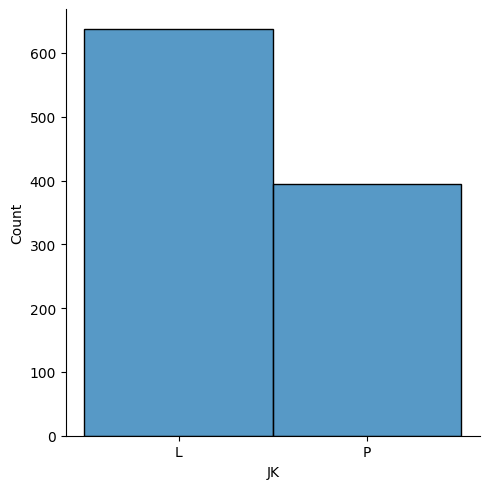

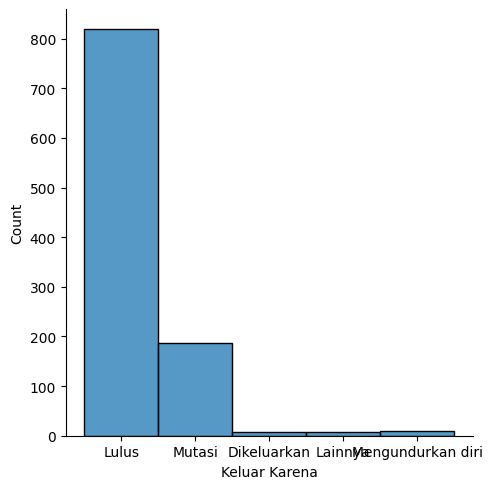

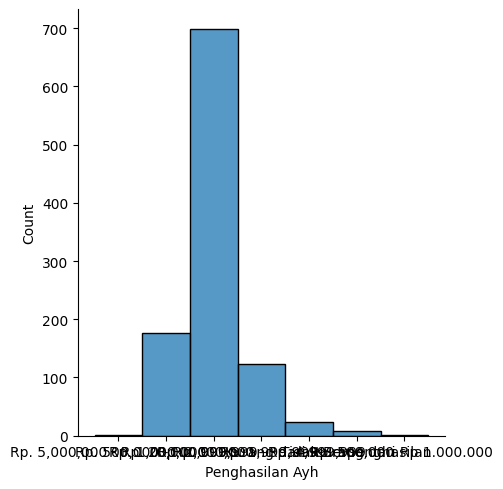

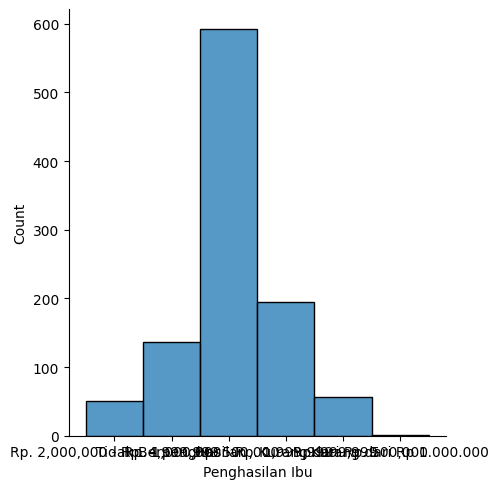

In [16]:
# visualisasi data
ax = sns.displot(data, x = "JK")
ax = sns.displot(data, x = "Keluar Karena")
ax = sns.displot(data, x = "Penghasilan Ayh")
ax = sns.displot(data, x = "Penghasilan Ibu")

In [17]:
data.describe()

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
count,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031
unique,2,889,109,262,7,7,12,16,7,12,14,6,5
top,L,2003-01-28,SEMARANG,Singorojo,Asrama,Jalan kaki,SD / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Tidak bekerja,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
freq,637,4,331,124,587,868,396,335,698,403,334,592,819


##### Konversi ke numerik

In [18]:
data["JK"] = pd.factorize(data.JK)[0]
data["Tempat Lahir"] = pd.factorize(data["Tempat Lahir"])[0]
data["Asal Kecamatan"] = pd.factorize(data["Asal Kecamatan"])[0]
data["Jenis Tinggal"] = pd.factorize(data["Jenis Tinggal"])[0]
data["Alat Transportasi"] = pd.factorize(data["Alat Transportasi"])[0]
data["Jenjang Pendidikan Ayh"] = pd.factorize(data["Jenjang Pendidikan Ayh"])[0]
data["Pekerjaan Ayh"] = pd.factorize(data["Pekerjaan Ayh"])[0]
data["Penghasilan Ayh"] = pd.factorize(data["Penghasilan Ayh"])[0]
data["Jenjang Pendidikan Ibu"] = pd.factorize(data["Jenjang Pendidikan Ibu"])[0]
data["Pekerjaan Ibu"] = pd.factorize(data["Pekerjaan Ibu"])[0]
data["Penghasilan Ibu"] = pd.factorize(data["Penghasilan Ibu"])[0]
data["Keluar Karena"] = pd.factorize(data["Keluar Karena"])[0]

# Save data
data.to_csv("data_numerik_1.csv")

## Exploratory Data Analysis (EDA)

### Explore `data_smk_askha`

In [19]:
data.sample(5)

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
384,0,1997-07-27,0,1,0,1,2,5,2,3,1,2,0
512,0,2000-10-02,23,160,3,1,4,5,2,5,1,2,1
137,1,2007-07-13,4,65,0,1,1,1,2,4,0,2,1
659,0,2004-06-26,4,8,2,1,1,1,3,2,4,3,0
66,0,1998-12-25,4,37,5,6,1,3,2,1,1,2,1


In [20]:
data.describe(include='all')

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
count,1031.000000,1031,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
unique,NaN,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2003-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.382153,NaN,9.840931,51.758487,1.745878,1.329777,1.635306,2.582929,2.016489,2.458778,2.059166,2.069835,0.258002
std,0.486150,NaN,21.379191,66.389194,1.264688,0.920044,1.492009,3.022675,0.687418,1.558565,1.999367,0.860668,0.608493
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,0.000000,7.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,0.000000,NaN,4.000000,22.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
75%,1.000000,NaN,4.000000,76.500000,2.000000,1.000000,2.000000,3.000000,2.000000,4.000000,3.000000,2.000000,0.000000


In [21]:
# splitting the data
from sklearn.model_selection import train_test_split

# define input and target variable
x = data[["JK", "Tempat Lahir", "Asal Kecamatan", "Jenis Tinggal", "Alat Transportasi", "Jenjang Pendidikan Ayh", "Pekerjaan Ayh", "Penghasilan Ayh", "Pekerjaan Ibu", "Penghasilan Ibu"]]
y = data["Keluar Karena"]

# splitting test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
from sklearn import tree

# define classification algorithm
dt_clf = tree.DecisionTreeClassifier(max_depth = 3, criterion = "entropy")
dt_clf = dt_clf.fit(x_train, y_train)

# generating prediction
y_pred = dt_clf.predict(x_test)

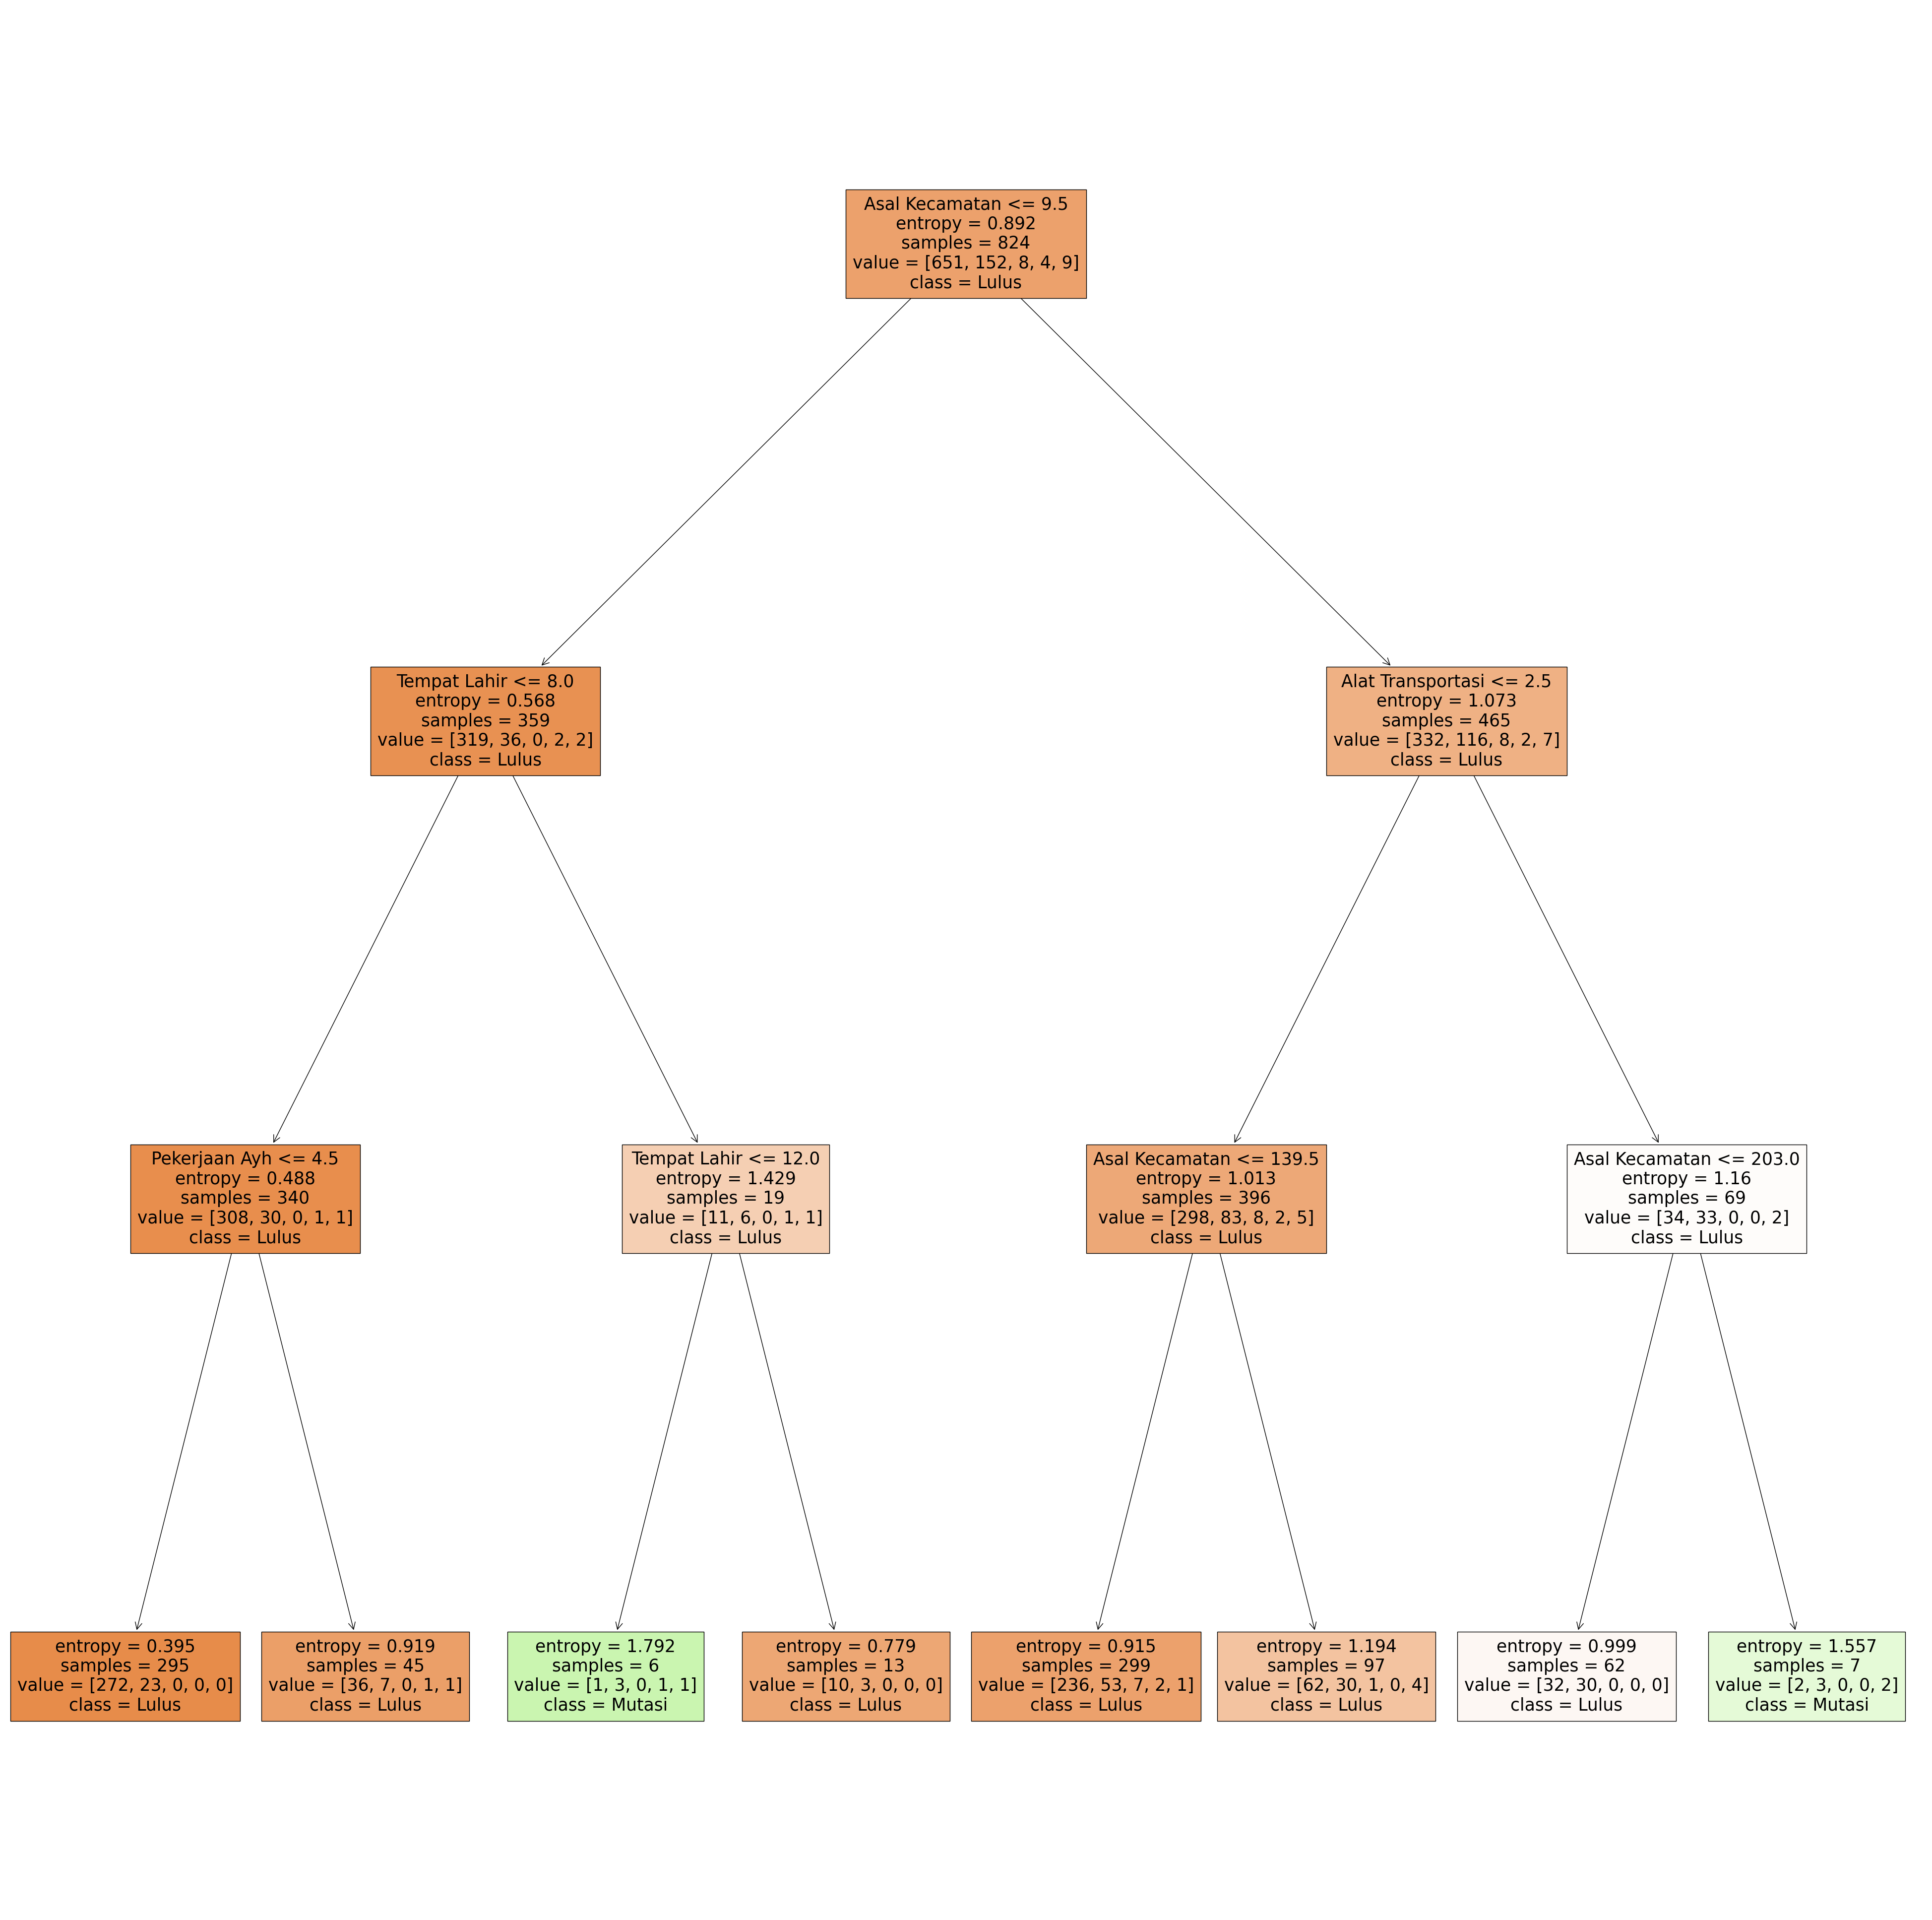

In [23]:
# plotting the decision tree
feature_names = ["JK", "Tempat Lahir", "Asal Kecamatan", "Jenis Tinggal", "Alat Transportasi", "Jenjang Pendidikan Ayh", "Pekerjaan Ayh", "Penghasilan Ayh", "Pekerjaan Ibu", "Penghasilan Ibu"]
class_names = ["Lulus", "Mutasi", "Dikeluarkan", "Mengundurkan Diri", "Lainnya"]

fig = plt.figure(figsize=(50,50))
plot = tree.plot_tree(dt_clf,
                      feature_names = feature_names,
                      class_names = class_names,
                      filled = True)
plt.show()

In [24]:
y_test.shape

(207,)

In [25]:
from sklearn.metrics import f1_score

# Misalkan y_test adalah label yang benar dan y_pred adalah hasil prediksi
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# f1_micro akan berisi skor F1 agregat
print(f1_weighted)

0.7271884057971014


In [26]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8115942028985508

In [27]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average='weighted')

0.658685150178534

In [28]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred, average='weighted')

0.8115942028985508

## Visualization